# Timeseries Stationarity

This notebook provides an example of transforming timeseries data as stationary, and verifying the results.

See the full blog post [here]().

Data sourced from [here](https://www.kaggle.com/datasets/mukeshmanral/univariate-time-series), under CC0 licensing.

<Axes: title={'center': 'Raw Data. ADF Test Value: -0.0566, P-Value: 0.954'}, xlabel='Date'>

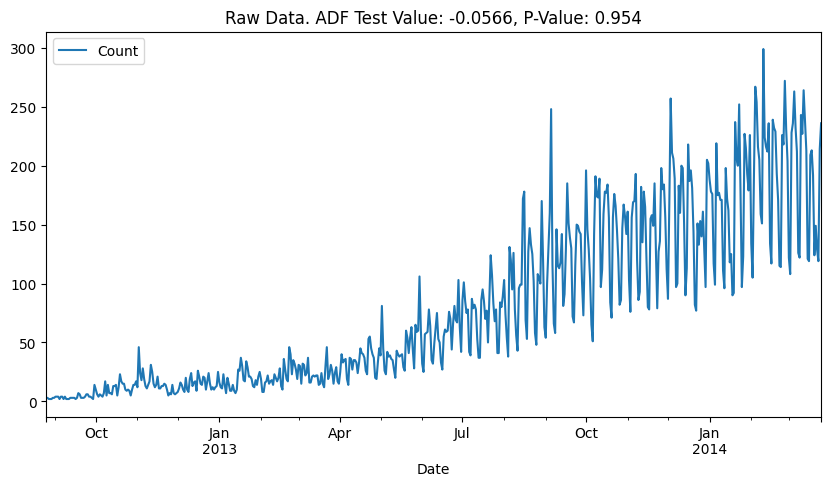

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

# Read in raw data
df = pd.read_csv("date_count.csv", parse_dates=["Date"])
df.columns = ["Date", "Count"]
df.set_index("Date", inplace=True)

# ADF test
adf, pvalue, _, _, _, _ = adfuller(df["Count"])

# Plot
df.plot(title=f"Raw Data. ADF Test Value: {adf:0.3}, P-Value: {pvalue:0.3}")

Here we can see the raw data. We can define the following hypotheses:

**H0: The variance and mean are not constant, and the timeseries is not stationary.**

**H1: The variance and mean are constant, and the timeseries is stationary.**

Looking at the graph, the variance and mean are clearly not constant. We can confirm that we fail to reject the null hypothesis at a 1% significance level using the Augmented Dickey-Fuller Test's P-Value, as 0.954 > 0.01.

Let's apply some of the transformations we have learnt about and see if we can improve this!

<Axes: title={'center': 'BoxCox Transformed. ADF Test Value: -1.66, P-Value: 0.454'}, xlabel='Date'>

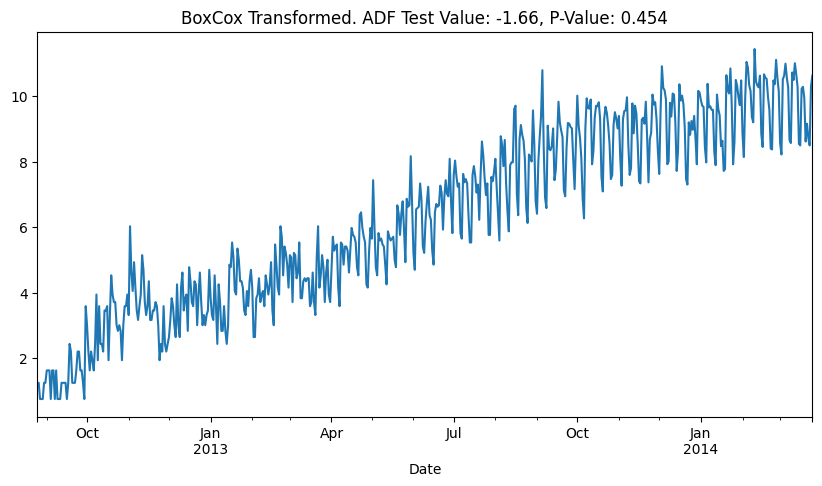

In [42]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
df["Count_BoxCox"], _ = boxcox(df["Count"])

# ADF test
adf, pvalue, _, _, _, _ = adfuller(df["Count_BoxCox"].dropna())

# Plot
df["Count_BoxCox"].plot(title=f"BoxCox Transformed. ADF Test Value: {adf:0.3}, P-Value: {pvalue:0.3}")

Looking at the graph, the Box-Cox transformation has clearly adjusted the variance of the data. It now looks a lot more constant than before. However, our mean still varies throughout time.

The ADF Test's P-Value confirms this, as we fail to reject the null hypothesis, as 0.454 > 0.01.

Let's try another transformation, to see if we can improve further.

<Axes: title={'center': 'BoxCox Transformed and Differenced. ADF Test Value: -8.13, P-Value: 1.07e-12'}, xlabel='Date'>

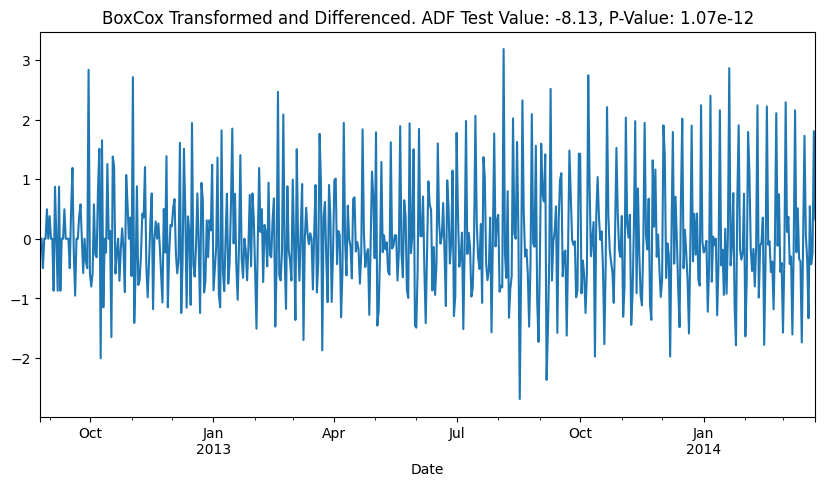

In [43]:
# Apply differencing
df["Count_BoxCox_Diff"] = df["Count_BoxCox"].diff()

# ADF test
adf, pvalue, _, _, _, _ = adfuller(df["Count_BoxCox_Diff"].dropna())

# Plot results
df["Count_BoxCox_Diff"].plot(title=f"BoxCox Transformed and Differenced. ADF Test Value: {adf:0.3}, P-Value: {pvalue:0.3}")

This looks a lot better, now the variance and mean appear constant from the graph.

The ADF Test's P-Value confirms this, as 1.07e-12 < 0.01, we can now reject the null hypothesis, at a 1% significance level.

This data is now ready for analysis and predictions, as the time component has been factored out.